# Excercise of LDA

## My understand:
* We want to classify classes, solution in here is we transform data to another basis. The basis should has the large between-class variance and small the within-class variances. So we optimize the expression: 
(m1 - m2)^2/s1^2 - s2^2 
= w^T*S_B*w / w^T*S_w*w

* So the above expression be maximum, the optimal point  is eigenvector whose the eigenvalue of the maxtrix S^-1_W*S_B have to maximum 


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Data

In [2]:
# data 
x = np.array([[4, 2], [2, 4], [2, 3], [3, 6], [4, 4], [9, 10], [6, 8], [9, 5],[8, 7],[10, 8]])

y = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
x1 = x[y == 1]
x2 = x[y == 2]

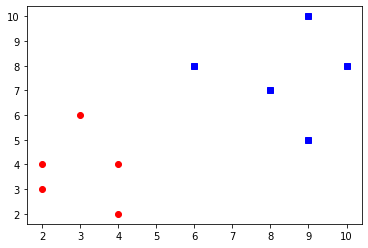

In [3]:
#plot before lda
plt.plot(x1[:,0], x1[:,1], 'ro')
plt.plot(x2[:,0], x2[:,1], 'bs')

## Find vector w

In [6]:
#find w
m1 = x1.mean(axis = 0)
m2 = x2.mean(axis = 0)
m = x.mean(axis = 0)
xx = x - m

e1 = x1 - m1
e2 = x2 - m2
sw = np.cov(x1.T) + np.cov(x2.T)

w = np.dot(np.linalg.pinv(sw),(m2-m1)*(m2-m1).T)
w = w / np.linalg.norm(w)
w = w.reshape(1,len(w))

## Plot

[[ 4.1931864   1.4358135 ]
 [ 3.01603722  1.03273896]
 [ 2.70955588  0.92779489]
 [ 4.52405583  1.54910844]
 [ 4.80614908  1.64570164]
 [11.12031677  3.80777276]
 [ 7.8221863   2.6784406 ]
 [ 9.58791007  3.28305241]
 [ 9.30581682  3.18645921]
 [11.40241003  3.90436596]]


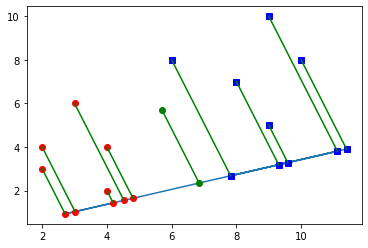

In [7]:
#plot after find w
#plot point 
plt.plot(x1[:,0], x1[:,1], 'ro')
plt.plot(x2[:,0], x2[:,1], 'bs')
plt.plot(m[0], m[1], 'go')

#plot line
o = np.dot(w,x.T)
o = np.dot(o.T,w)
print(o)
plt.plot(o[:,0],o[:,1])
o1 = o[y==1]
o2 = o[y==2]
plt.plot(o1[:,0],o1[:,1],'ro')
plt.plot(o2[:,0],o2[:,1],'bs')

om = np.dot(w,m)
om = np.dot(om,w)
plt.plot(om[0],om[1],'go')

for i in range(len(x)):
    plt.plot(np.array([x[i,0],o[i,0]] ) ,np.array([x[i,1],o[i,1]] ),'g-')

plt.plot(np.array([m[0],om[0]]), np.array([m[1],om[1]]), 'g-')  

